<a href="https://colab.research.google.com/github/nedith/Machine-Learning/blob/main/Edith_KMeans_Hierachical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment Two: Customer Segmentation**

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Refactory/cust_seg.csv')
df.head()

Unnamed: 0  Customer Id  Age  Edu  Years Employed  Income  Card Debt  \
0           0            1   41    2               6      19      0.124   
1           1            2   47    1              26     100      4.582   
2           2            3   33    2              10      57      6.111   
3           3            4   29    2               4      19      0.681   
4           4            5   47    1              31     253      9.308   

   Other Debt  Defaulted  DebtIncomeRatio  
0       1.073        0.0              6.3  
1       8.218        0.0             12.8  
2       5.802        1.0             20.9  
3       0.516        0.0              6.3  
4       8.908        0.0              7.2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [5]:
df['Defaulted'] = df['Defaulted'].fillna(df['Defaulted'].mode()[0])

In [6]:
del df['Unnamed: 0']
del df['Customer Id']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        850 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [8]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

**KMeans Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

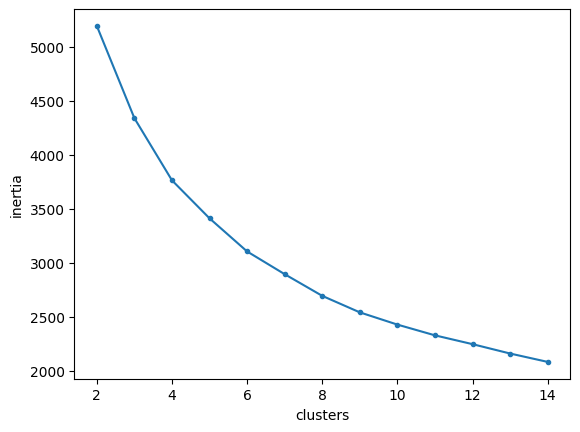

In [9]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,15):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,15), inertias, marker = '.');
plt.xlabel('clusters')
plt.ylabel('inertia')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

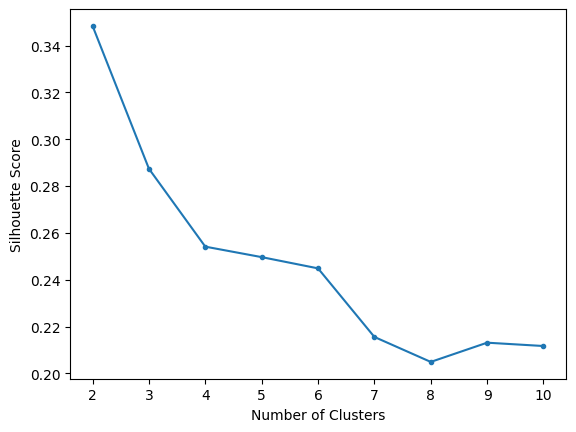

In [10]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [11]:
kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(scaled_df)
silhouette_score(scaled_df, kmeans2.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.34248044225007934

In [12]:
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(scaled_df)
silhouette_score(scaled_df, kmeans3.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.28738683325129355

I have selected n_clusters = 2 because of the higher silhouette score

In [13]:
df['cluster'] = kmeans2.fit_predict(scaled_df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


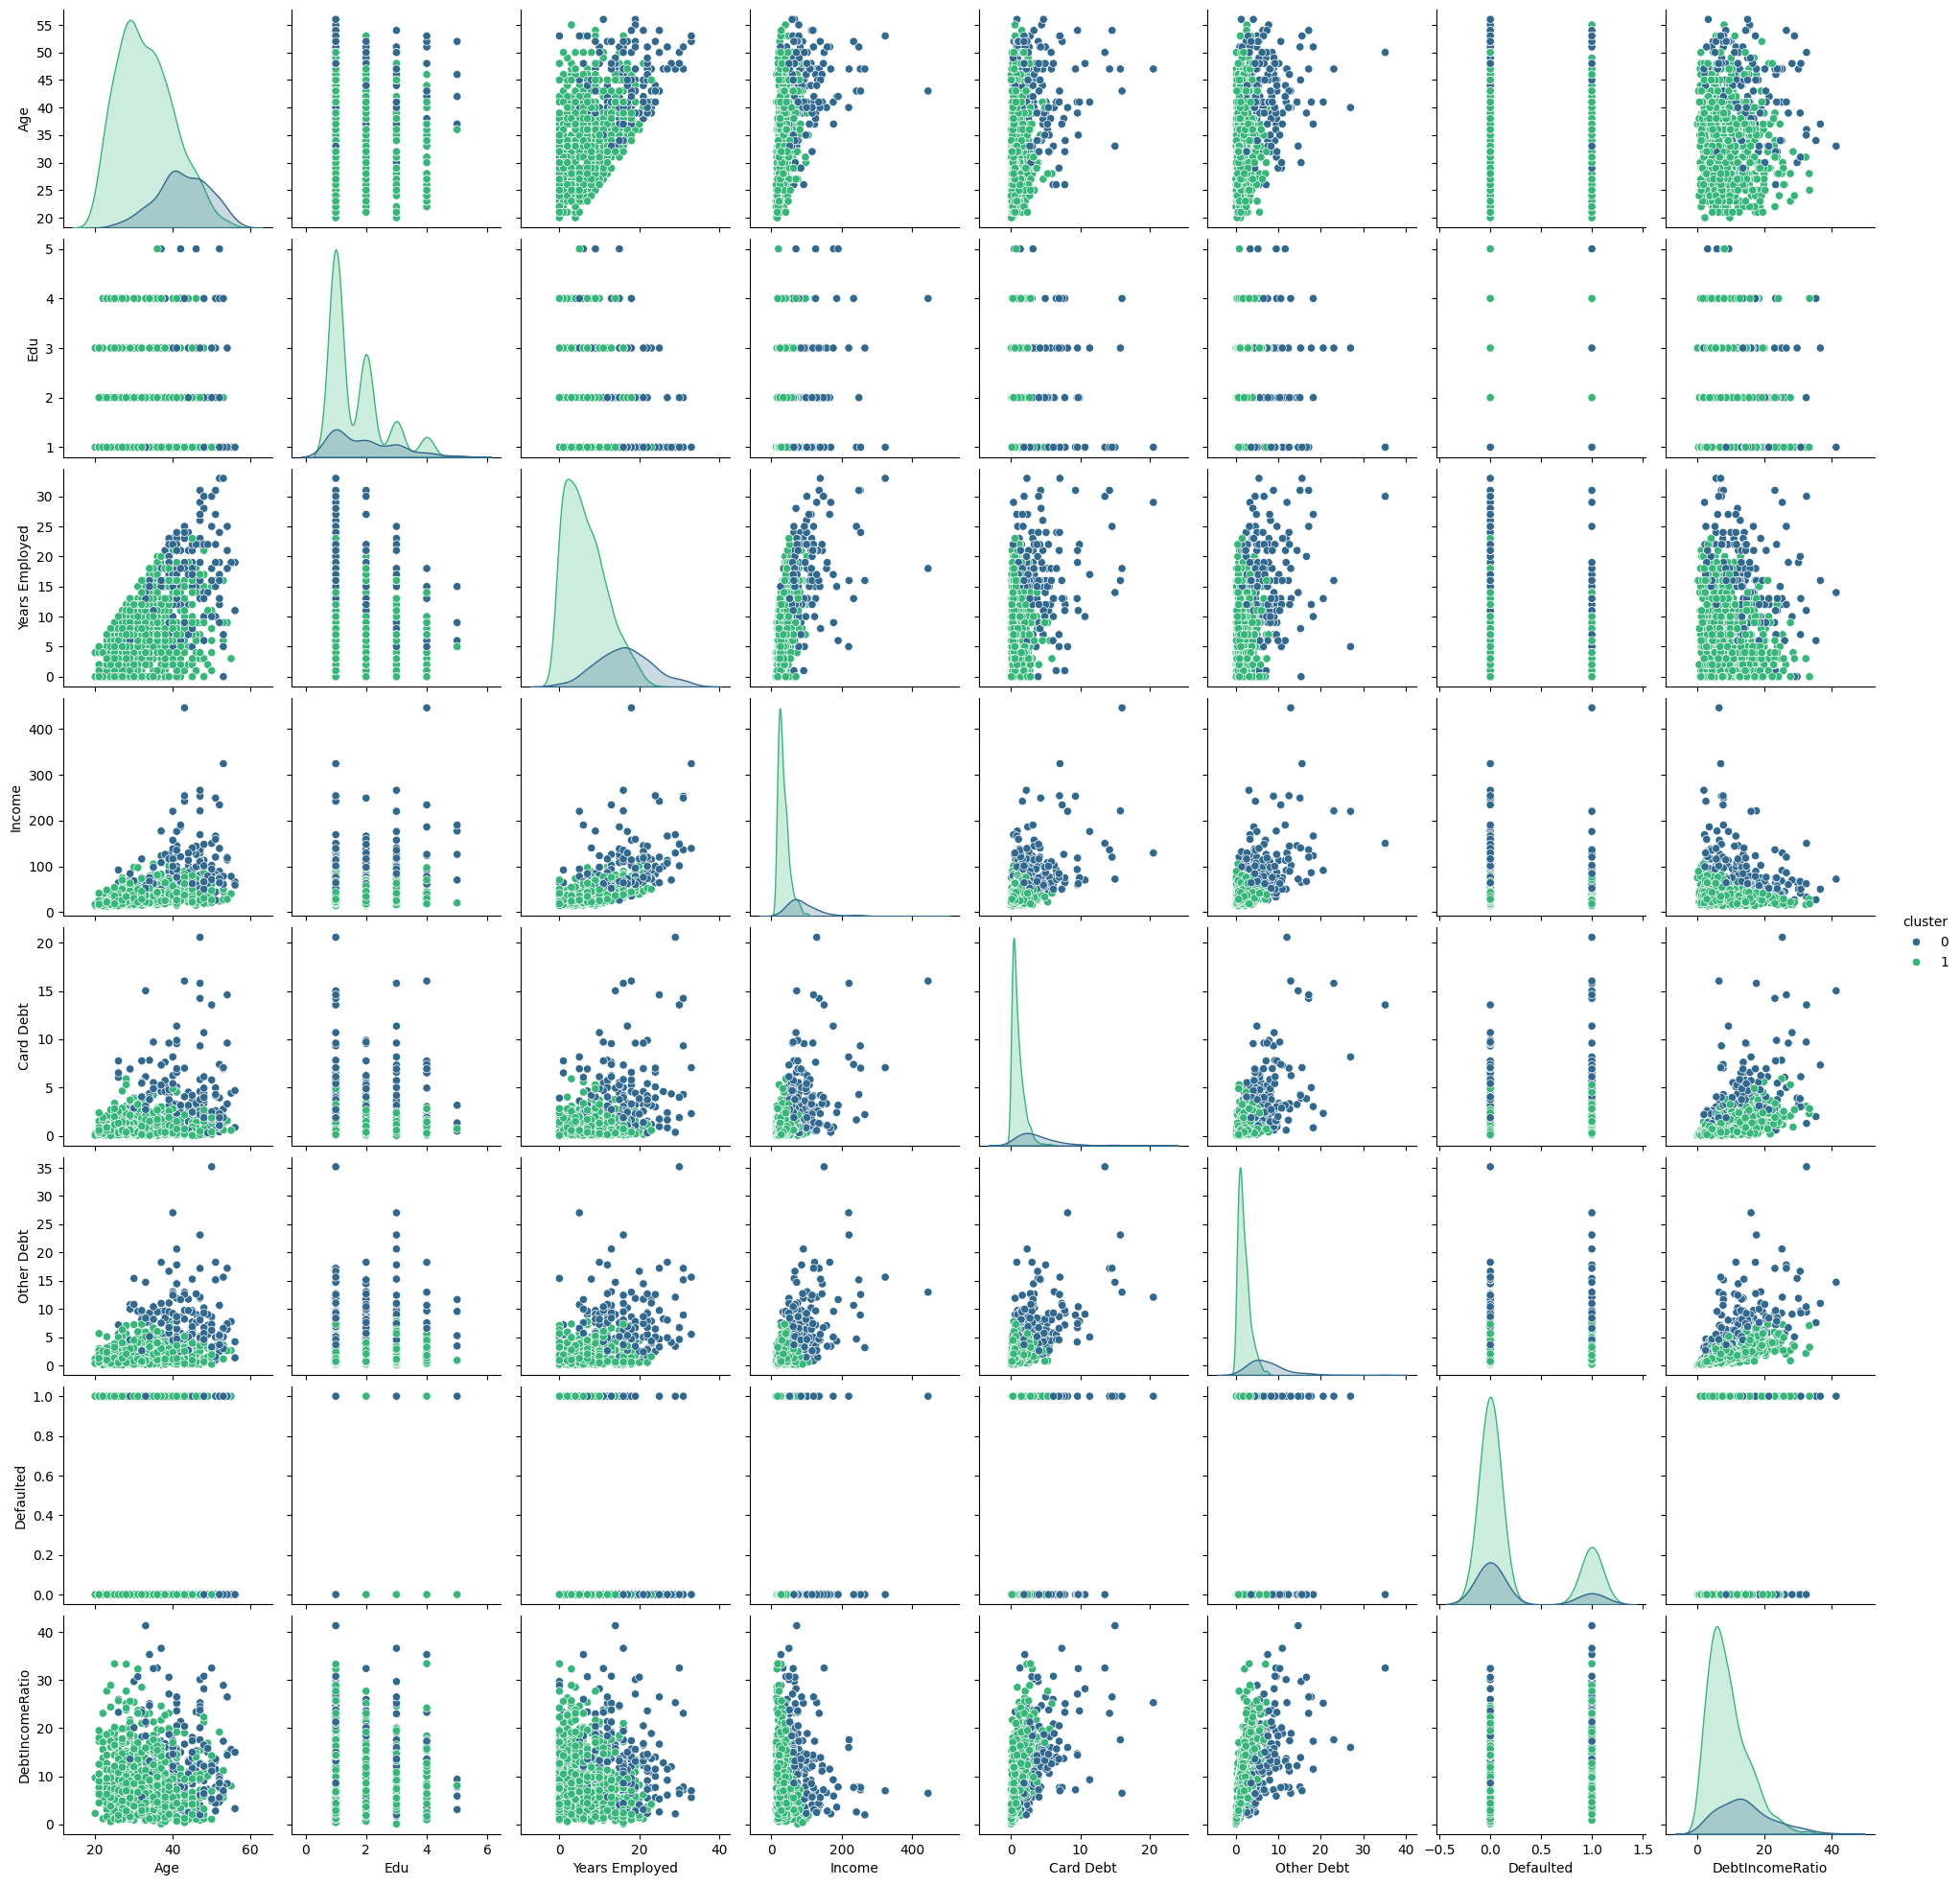

In [14]:
sns.pairplot(data=df, hue='cluster', palette='viridis')
plt.show()

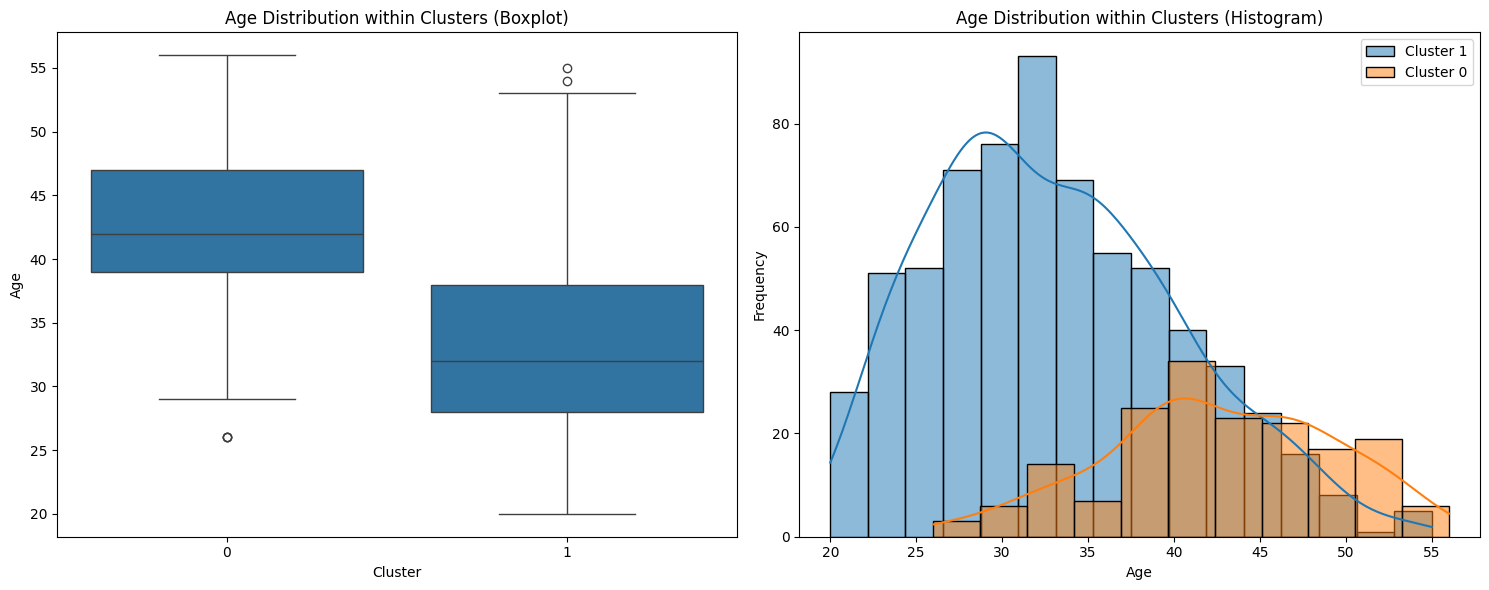

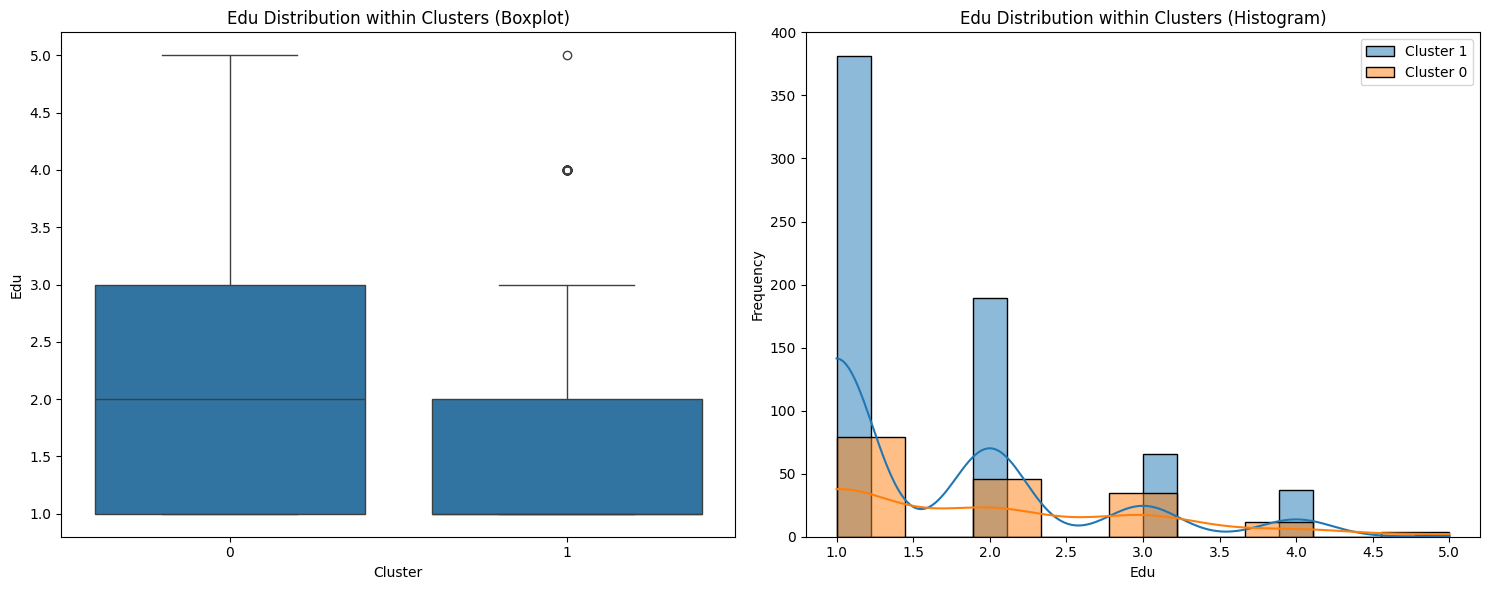

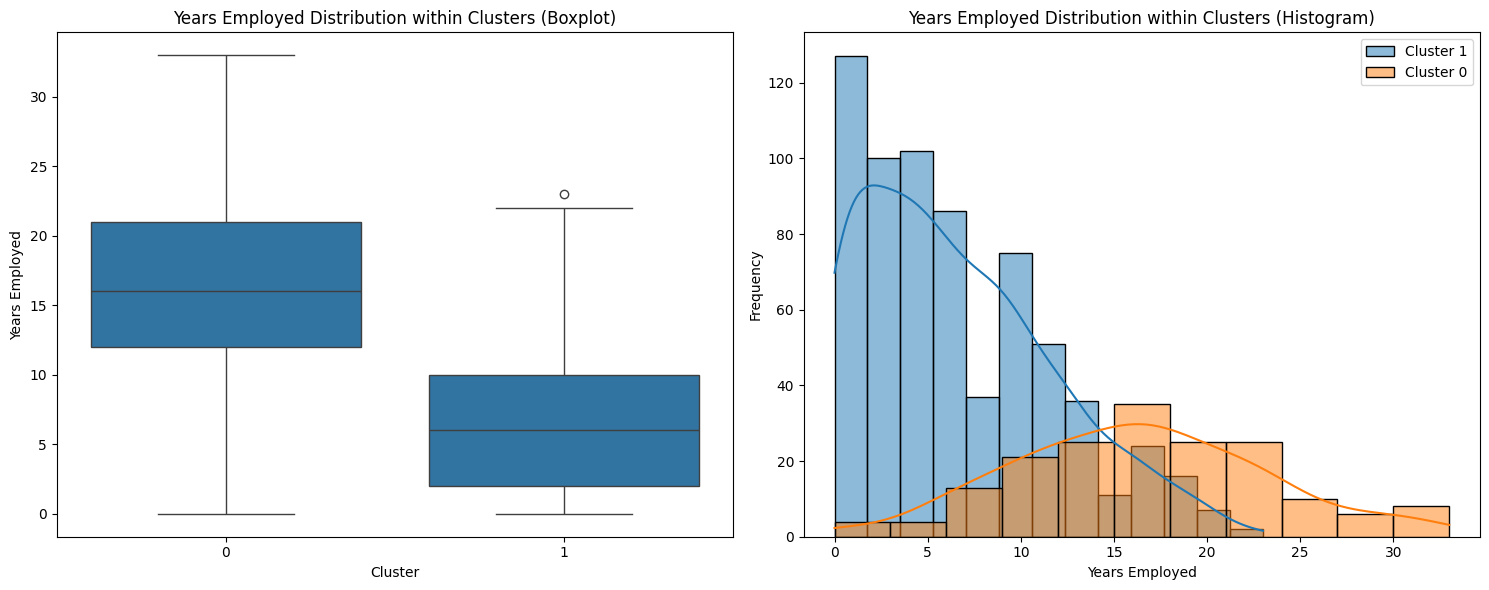

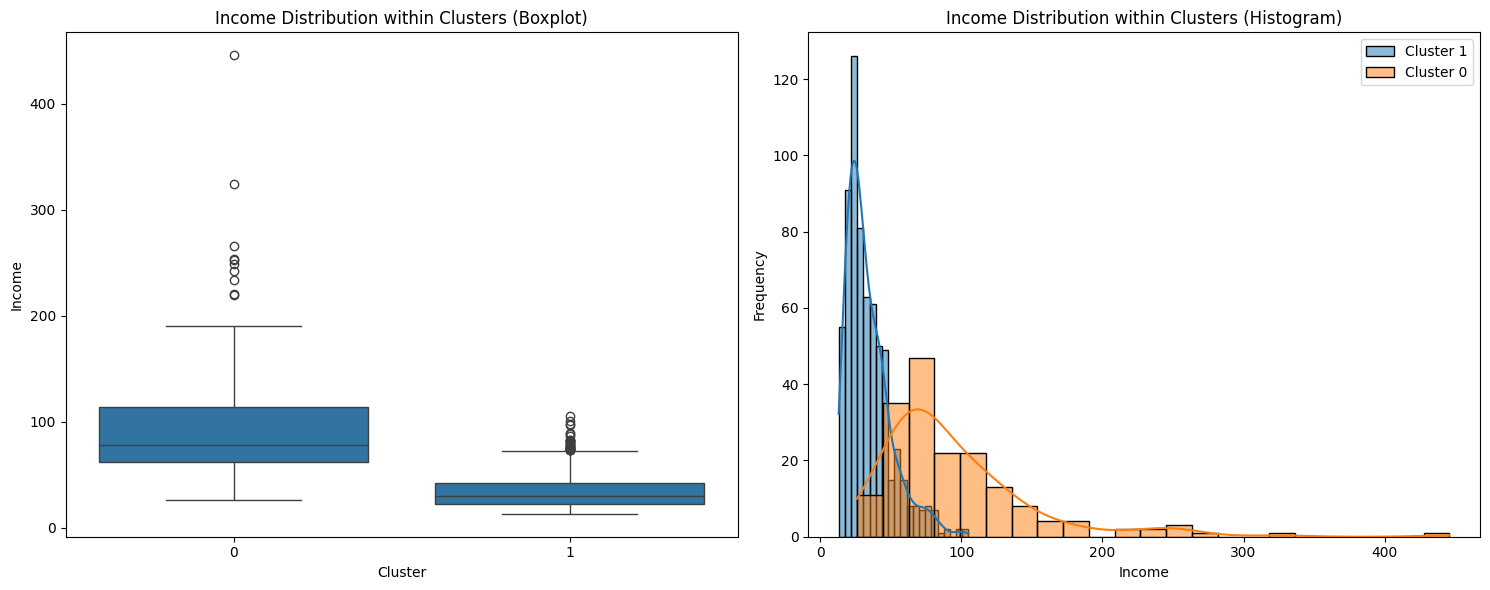

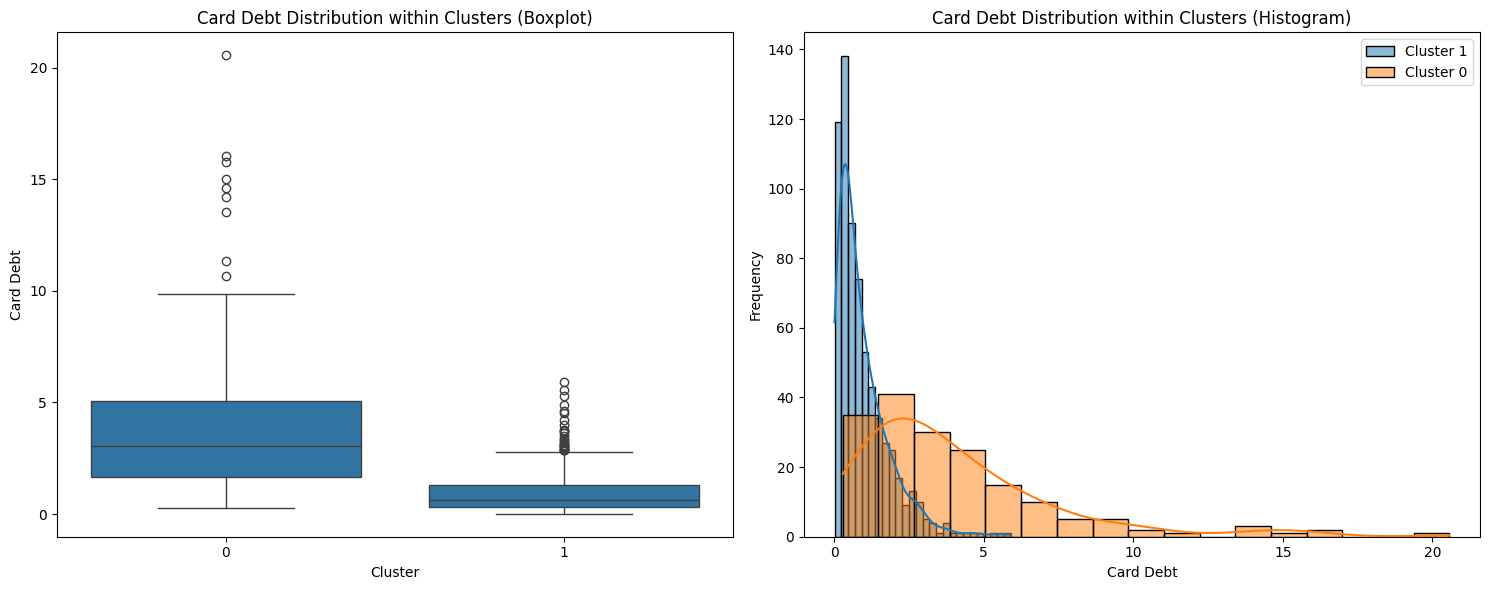

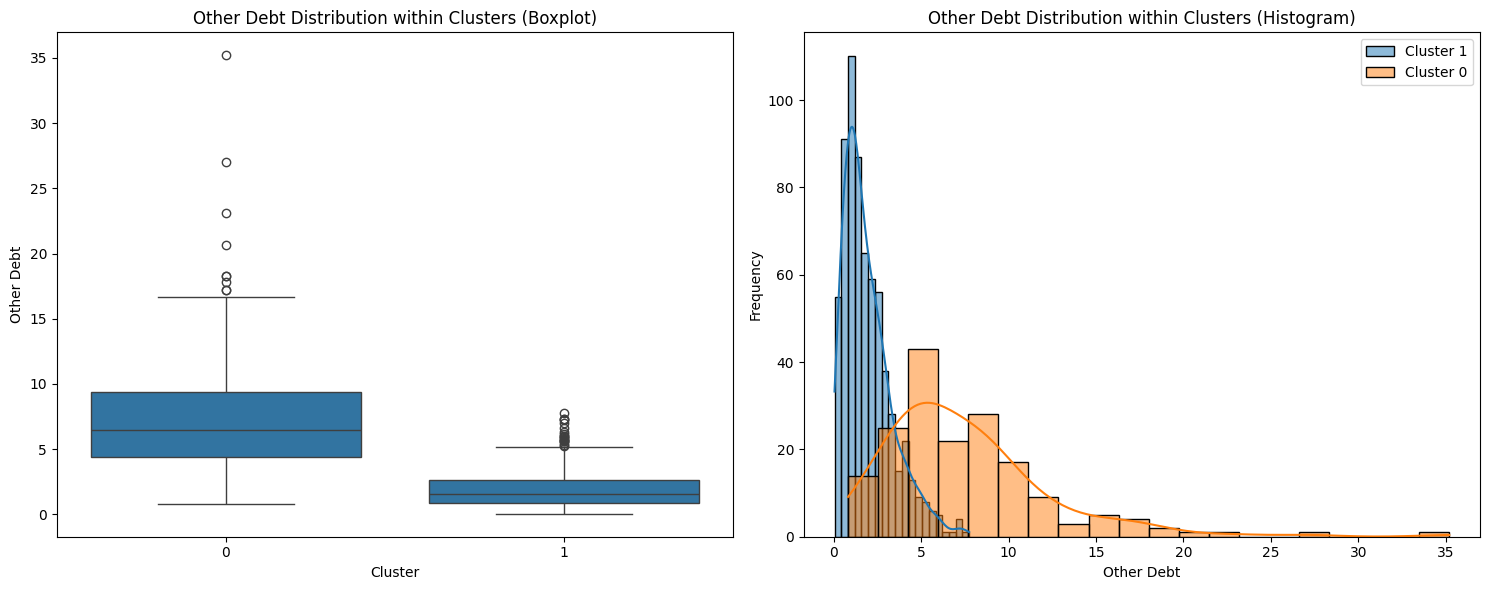

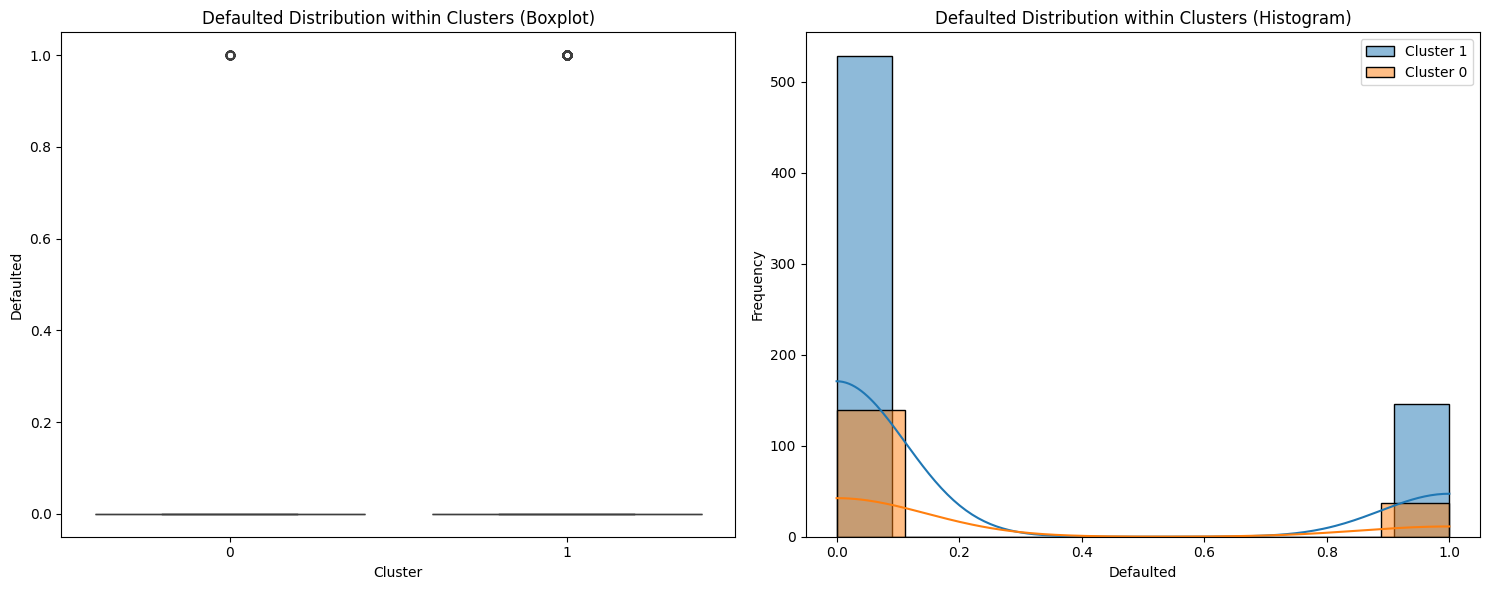

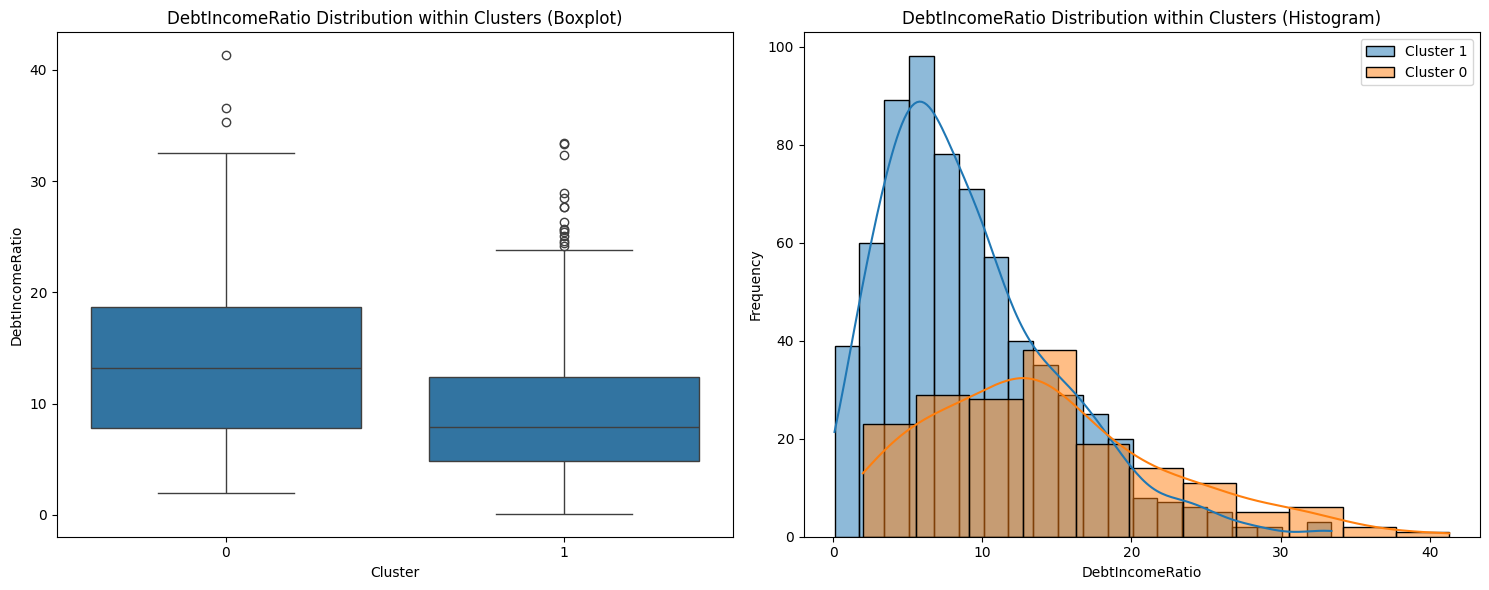

In [15]:

# Iterate over each feature
for feature in df.columns[:-1]:  # Exclude the 'cluster' column
    plt.figure(figsize=(15, 6))

    # Create a subplot with 1 row and 2 columns
    plt.subplot(1, 2, 1)

    # Use seaborn's boxplot to visualize feature distribution within each cluster
    sns.boxplot(x='cluster', y=feature, data=df)

    # Add labels and title for boxplot
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.title(f'{feature} Distribution within Clusters (Boxplot)')

    # Create a subplot with 1 row and 2 columns
    plt.subplot(1, 2, 2)

    # Use seaborn's histogram to visualize feature distribution within each cluster
    for cluster_id in df['cluster'].unique():
        sns.histplot(df[df['cluster'] == cluster_id][feature], kde=True, label=f'Cluster {cluster_id}')

    # Add labels and title for histogram
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} Distribution within Clusters (Histogram)')

    # Add legend to the histogram
    plt.legend()

    # Adjust layout
    plt.tight_layout()

    plt.show()


In [16]:
df.columns

Index(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt',
       'Defaulted', 'DebtIncomeRatio', 'cluster'],
      dtype='object')

In [17]:
df.groupby(['cluster'])[[x for x in list(df.columns)]].mean()

Age       Edu  Years Employed     Income  Card Debt  \
cluster                                                              
0        42.590909  1.954545       16.255682  95.437500   4.014068   
1        33.054896  1.646884        6.557864  33.942136   0.940387   

         Other Debt  Defaulted  DebtIncomeRatio  cluster  
cluster                                                   
0           7.52546   0.210227        14.203977      0.0  
1           1.91762   0.216617         9.118694      1.0

**Cluster Descriptions**

**Cluster zero** - These individuals are generally younger (33 years) and slightly less educated(1.64 years), they have worked for fewer years(7 years) and have less average income(33.9) than cluster 1. They also have less debt and less debtIncomeRatio.

**Cluster one** - These individuals are generally older(42 years) and slightly more educated(1.95 years), they have woked for more years(16 years) and have higher income(95.4) than cluster 0.They have more debt and a greater debtIncomeratio.



**Recommendations**

Cluster zero
1.   Provide credit cards with low limits to help them build credit responsibly
2.   Provide incentives for responsible spending and saving eg less interest rates

Cluster one
1. Offer credit cards with exclusive benefits eg platinum, express or gold cards with benefits such as cashback rewards and travel perks
2. Give them personalised date repayment strategies and offers eg 0.5%  reduction for debt repayment in 1 year


**Hierarchical clustering**

In [18]:
X = df.drop('cluster', axis=1)  # Exclude the 'cluster' column if present

In [19]:
# Choose the number of clusters
n_clusters = 2  # Adjust as needed

# Choose the linkage method ('ward', 'complete', 'average', 'single')
#the linkage method defines how the distance between clusters is calculated during the agglomeration process

linkage_method = 'ward'  # Adjust as needed


In [20]:
model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
df['hierarchical_cluster'] = model.fit_predict(X)


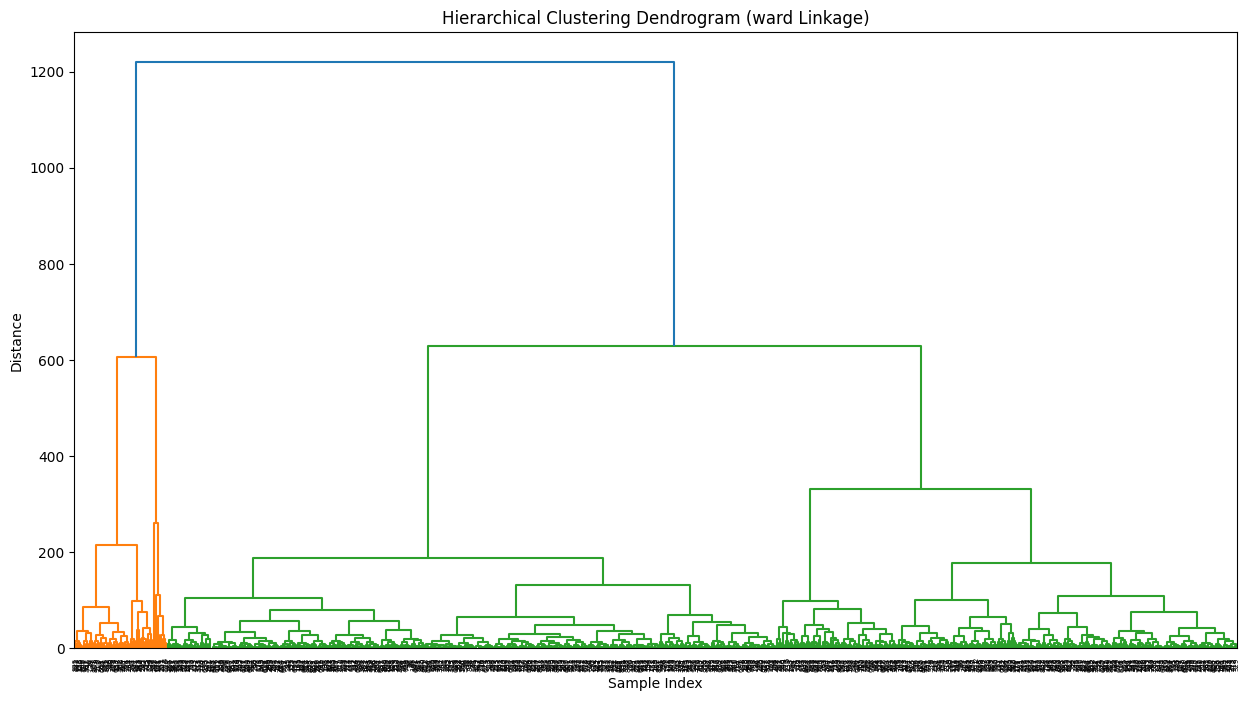

In [ ]:
# Create a dendrogram
linkage_matrix = linkage(X, method=linkage_method)

plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix)
plt.title(f'Hierarchical Clustering Dendrogram ({linkage_method} Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


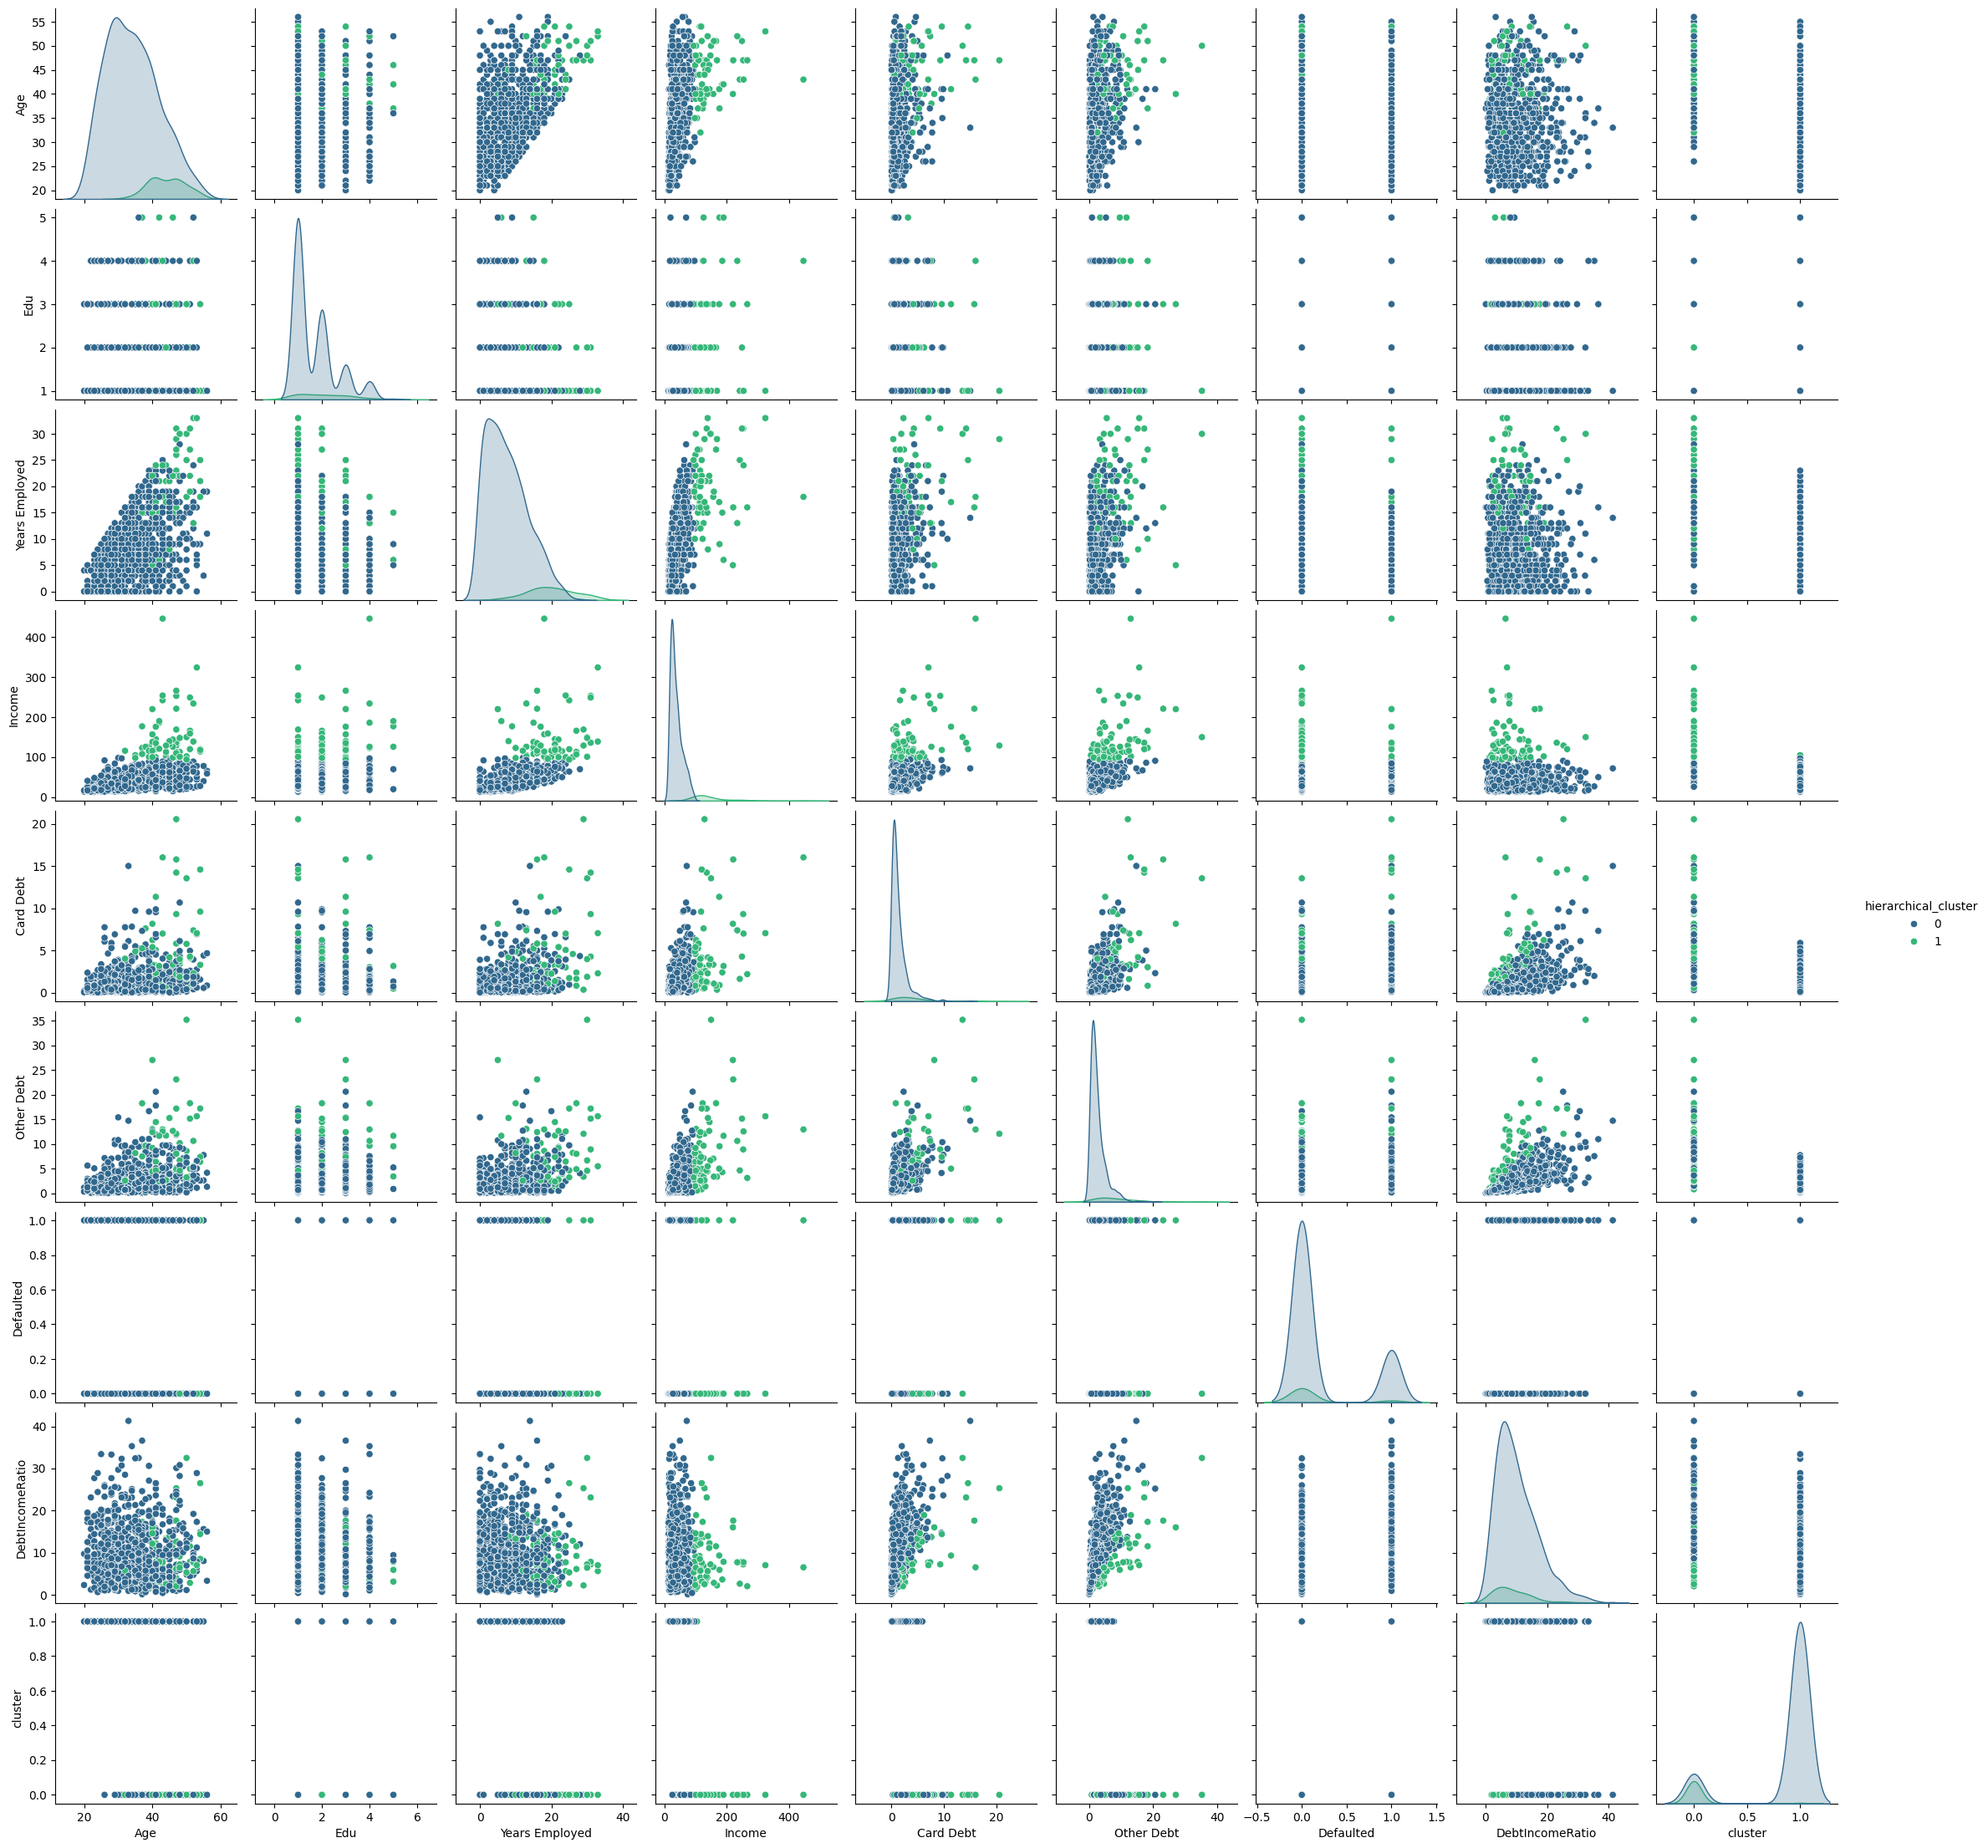

In [21]:
# Visualize the resulting clusters
sns.pairplot(data=df, hue='hierarchical_cluster', palette='viridis', diag_kind='kde')
plt.show()


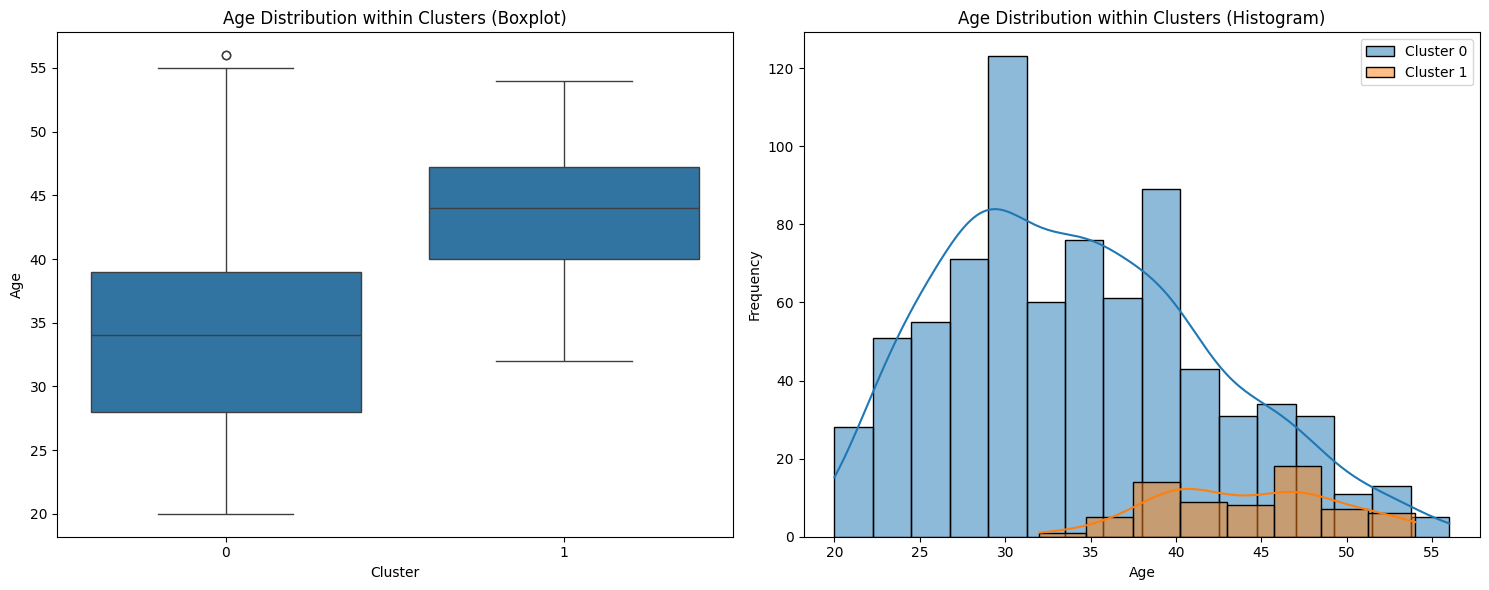

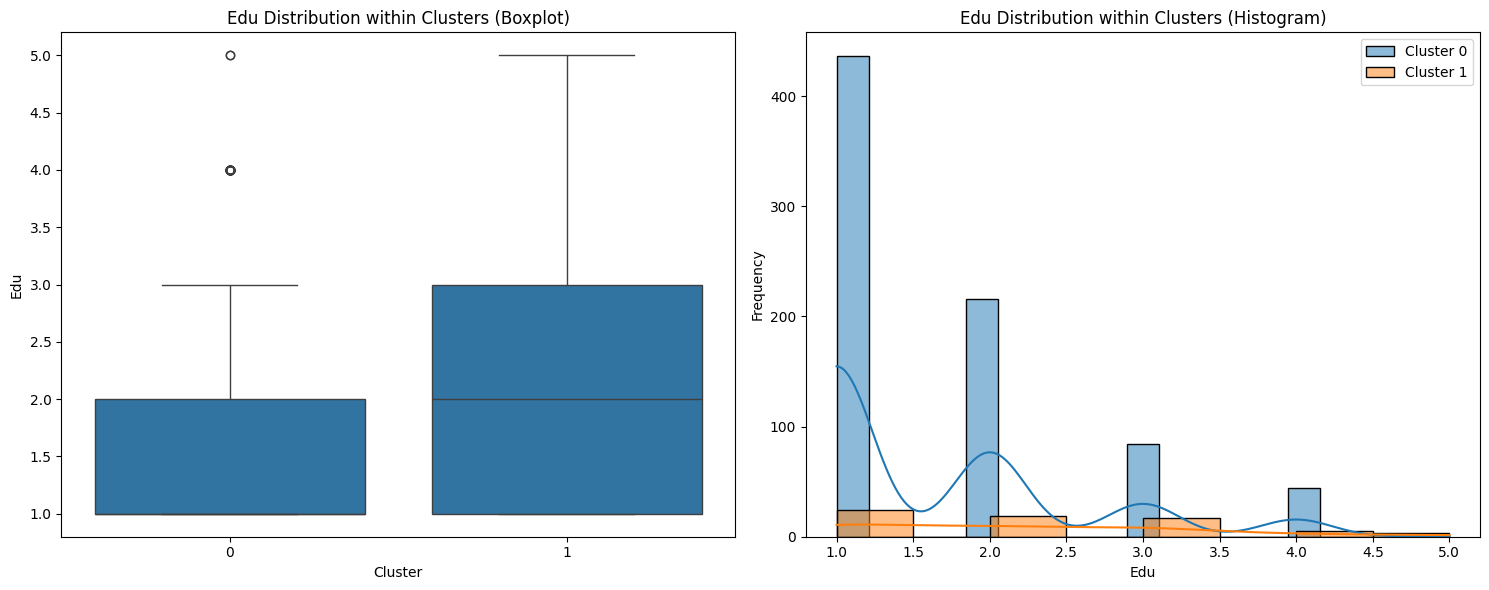

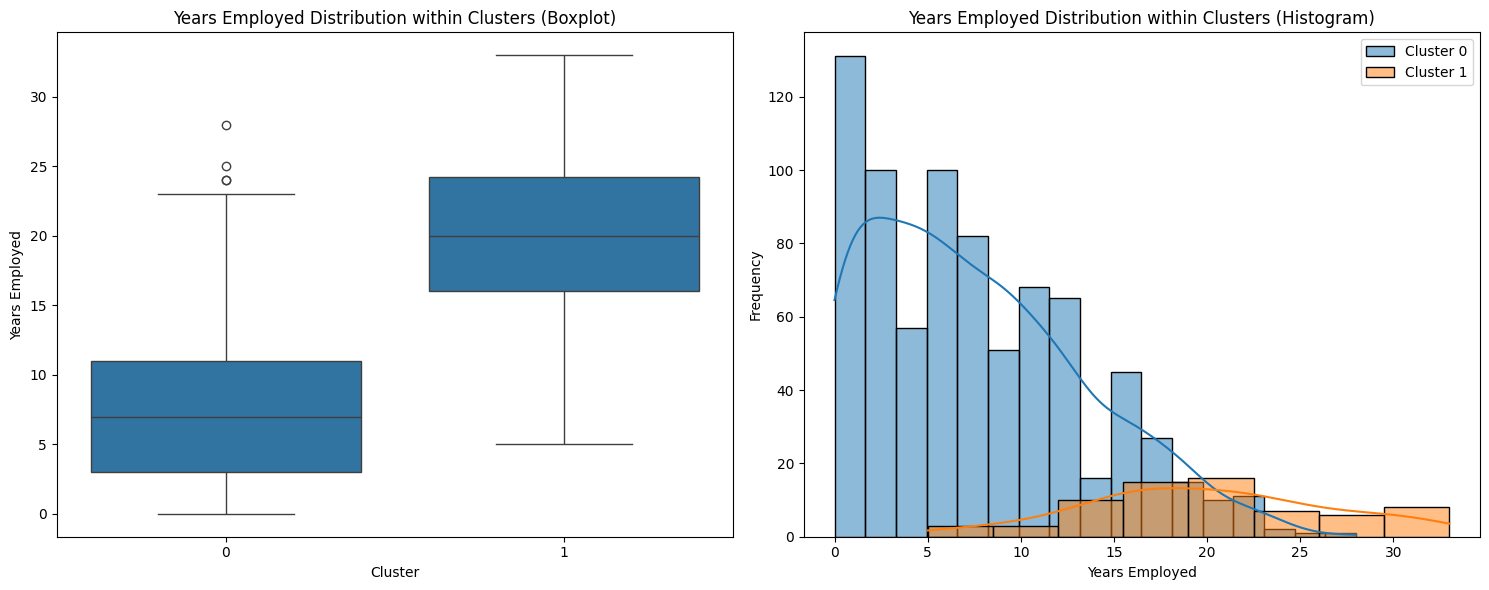

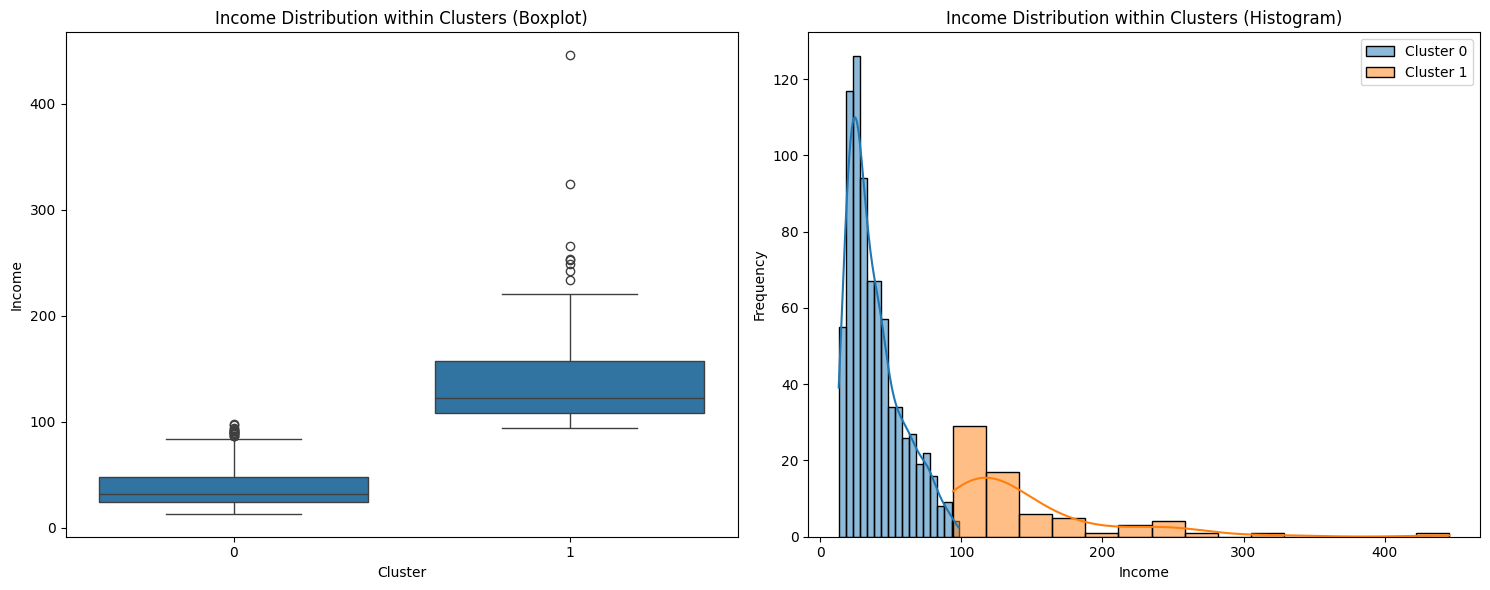

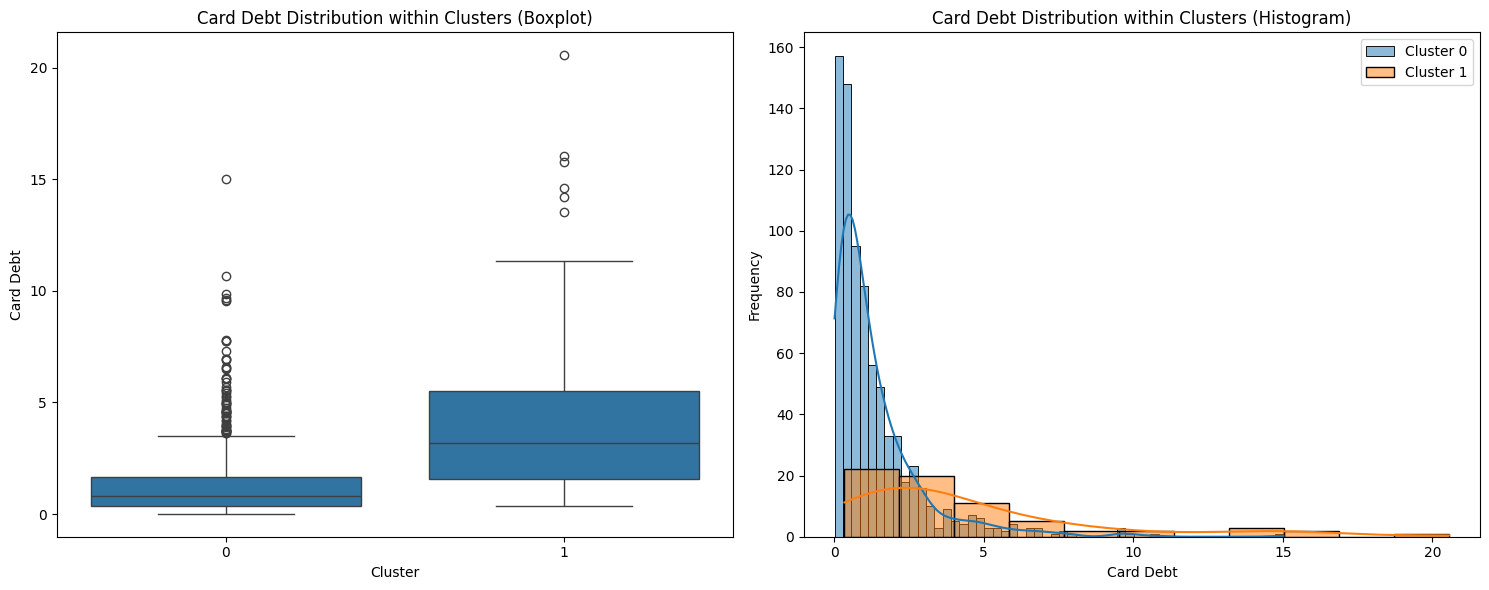

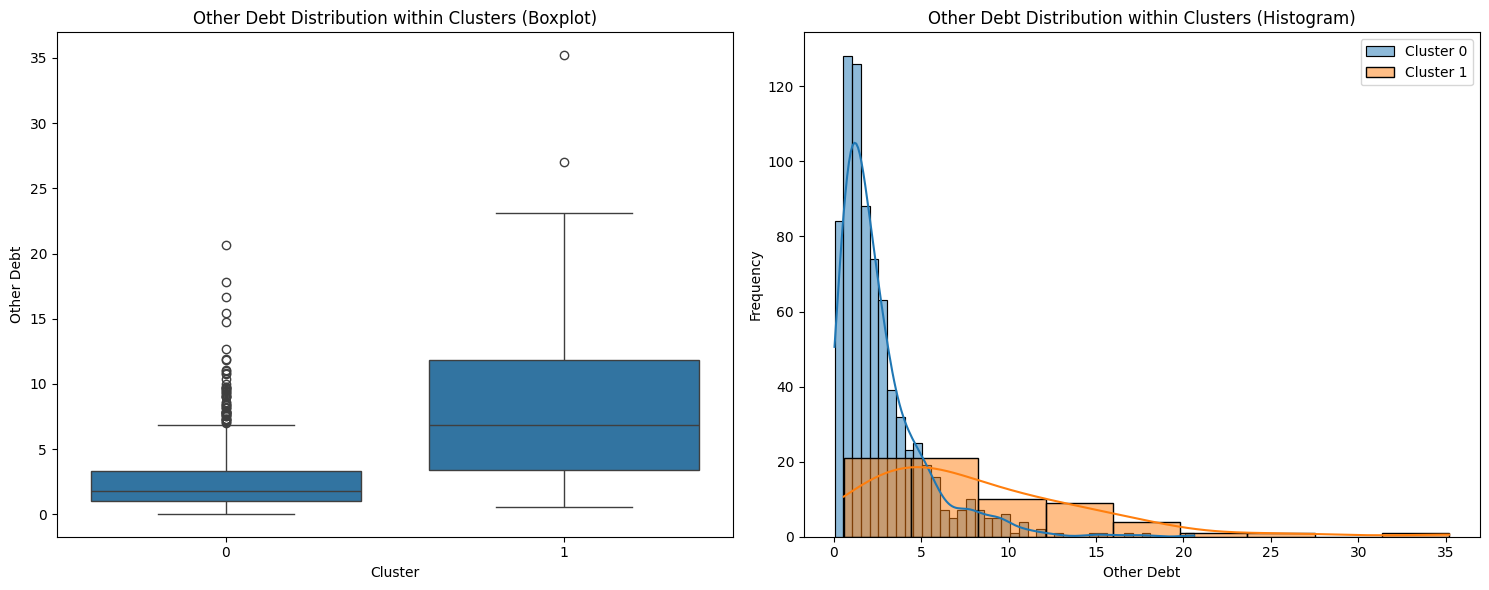

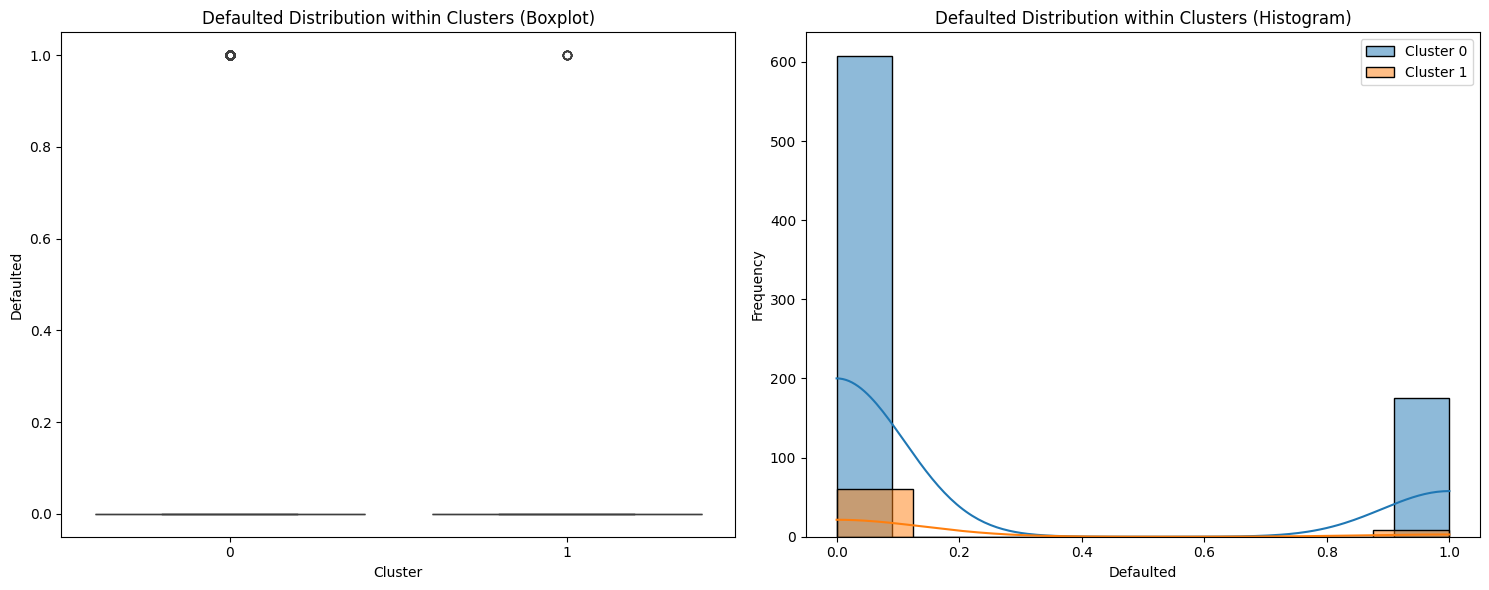

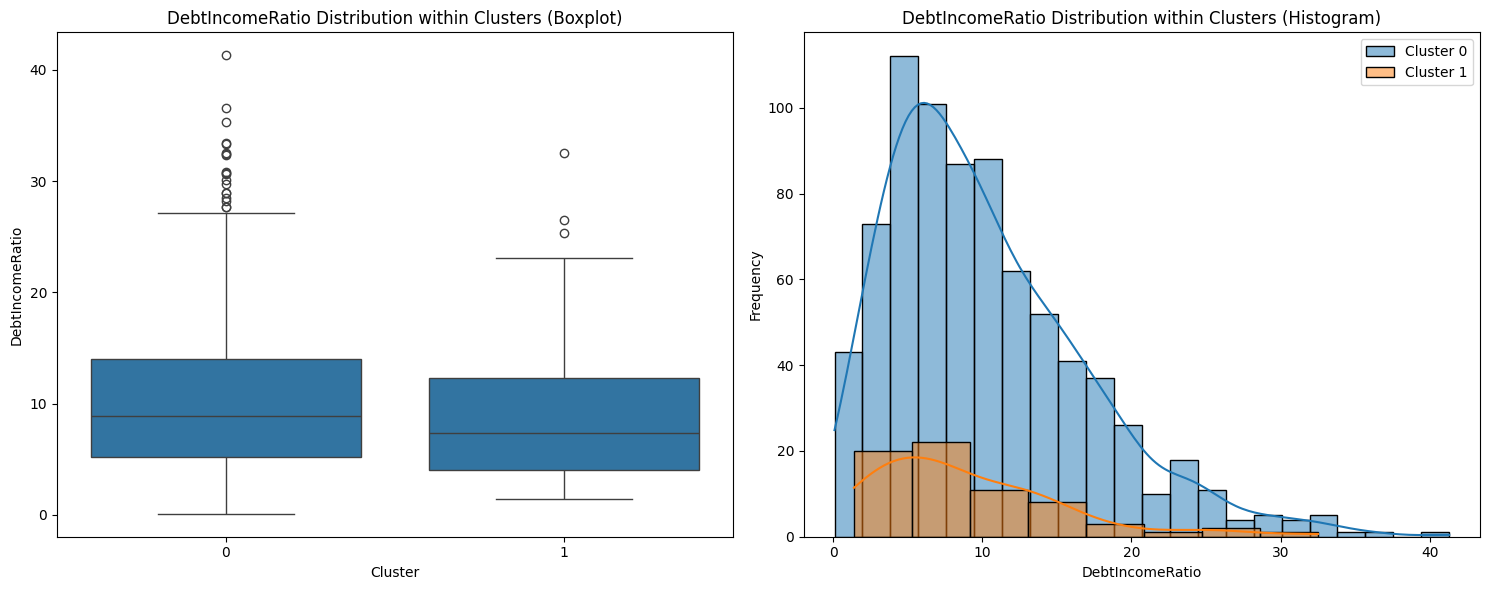

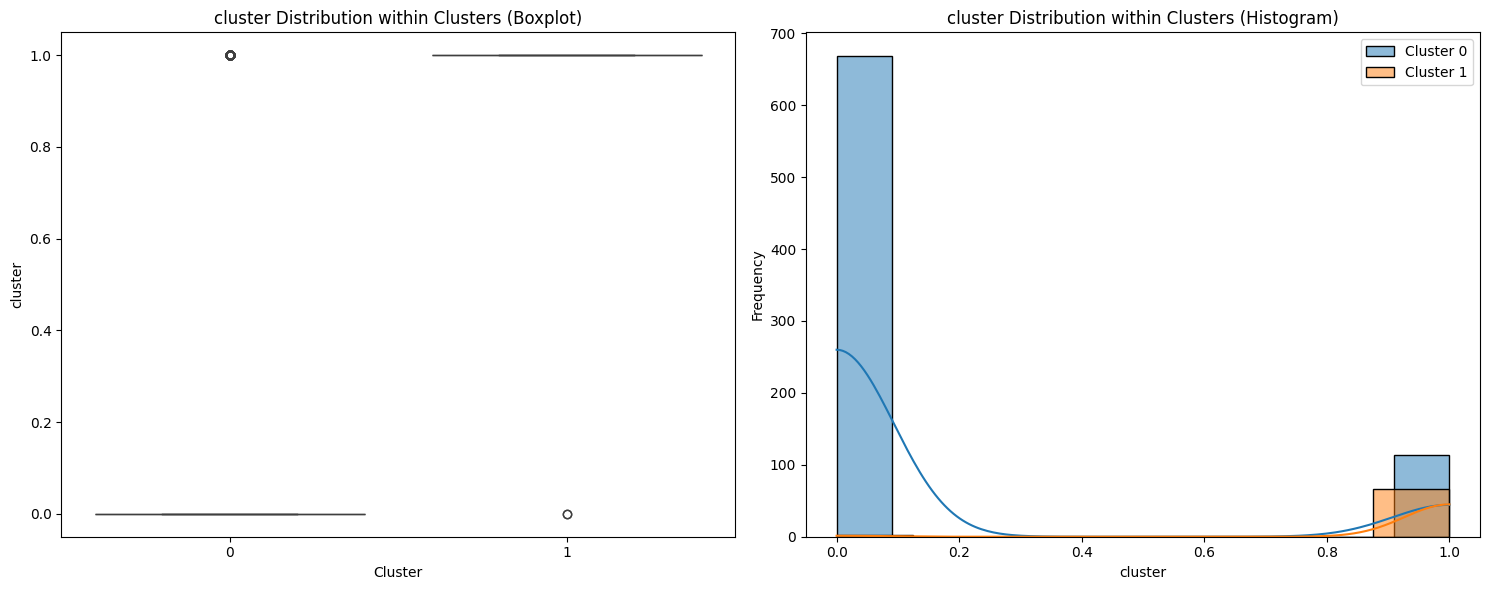

In [ ]:

# Iterate over each feature
for feature in df.columns[:-1]:  # Exclude the 'cluster' column
    plt.figure(figsize=(15, 6))

    # Create a subplot with 1 row and 2 columns
    plt.subplot(1, 2, 1)

    # Use seaborn's boxplot to visualize feature distribution within each cluster
    sns.boxplot(x='hierarchical_cluster', y=feature, data=df)

    # Add labels and title for boxplot
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.title(f'{feature} Distribution within Clusters (Boxplot)')

    # Create a subplot with 1 row and 2 columns
    plt.subplot(1, 2, 2)

    # Use seaborn's histogram to visualize feature distribution within each cluster
    for cluster_id in df['hierarchical_cluster'].unique():
        sns.histplot(df[df['hierarchical_cluster'] == cluster_id][feature], kde=True, label=f'Cluster {cluster_id}')

    # Add labels and title for histogram
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} Distribution within Clusters (Histogram)')

    # Add legend to the histogram
    plt.legend()

    # Adjust layout
    plt.tight_layout()

    plt.show()


Description of the clusters.

In [22]:
df.groupby(['hierarchical_cluster'])[[x for x in list(df.columns)]].mean()

Age       Edu  Years Employed      Income  \
hierarchical_cluster                                                    
0                     34.226343  1.670077        7.569054   38.051151   
1                     44.264706  2.176471       20.029412  145.852941   

                      Card Debt  Other Debt  Defaulted  DebtIncomeRatio  \
hierarchical_cluster                                                      
0                      1.324832    2.622623   0.223785        10.274680   
1                      4.474676    8.324500   0.117647         8.986765   

                       cluster  hierarchical_cluster  
hierarchical_cluster                                  
0                     0.859335                   0.0  
1                     0.029412                   1.0

In [23]:
df.groupby(['cluster'])[[x for x in list(df.columns)]].mean()

Age       Edu  Years Employed     Income  Card Debt  \
cluster                                                              
0        42.590909  1.954545       16.255682  95.437500   4.014068   
1        33.054896  1.646884        6.557864  33.942136   0.940387   

         Other Debt  Defaulted  DebtIncomeRatio  cluster  hierarchical_cluster  
cluster                                                                         
0           7.52546   0.210227        14.203977      0.0              0.375000  
1           1.91762   0.216617         9.118694      1.0              0.002967